# Specifying a non-stationary model with time-heterogeneous parameters

A model is considered time-heterogeneous if rate matrix terms differ between edges on a tree.

In this example, we load the and display our sample primate tree, highlighting the edge sets that will be assigned different rate matrices.

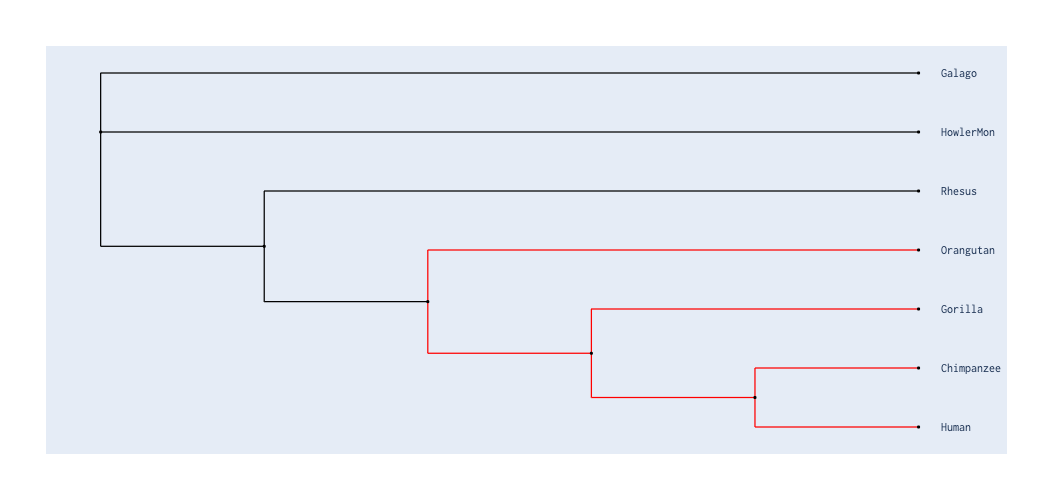

In [1]:
from cogent3 import load_tree
from cogent3.app import io, evo

tree = load_tree("../data/primate_brca1.tree")
fig = tree.get_figure(contemporaneous=True)
fig.style_edges("Human", tip2="Orangutan",
                outgroup="Galago",
                line=dict(color="red"))
fig.show(width=500, height=500)

## Specify a distinct rate matrix for the great apes

As illustrated above, this is done by specifying the names of two "ingroup" tips (their last common ancestor is the ancestor of all edges of interest) and an "outgroup" tip. We can define the clade by Orangutan and one of Human, Chimpanzee or Gorilla. Any tip not a member of the clade outside suffices as an outgroup.

To construct a `model` with this information, we create a dictionary that we assign to the `time_het` argument as follows.

In [2]:
time_het = evo.model("GN", tree=tree,
                     time_het=[dict(tip_names=["Human", "Orangutan"],
                                     outgroup_name="Galago")])

The outcome of this setting to `model` is that the black edges will share one rate matrix, the red edges another. We fit the model to the sample data set.

In [3]:
reader = io.load_aligned(format="fasta")
aln = reader("../data/primate_brca1.fasta")
result = time_het(aln)

Examining the fitted likelihood function, the rate parameters differ between the edge sets.

In [4]:
result.lf